In [ ]:
%cd /content/drive/MyDrive/Colab \Notebooks
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks
diabetic-retinopathy-detection	ICD-10	Untitled0.ipynb
fashion_yolov4			Lee
Fashion_YOLOv4_pytorch.ipynb	MCUT


In [ ]:
import pandas as pd
# from sklearn import datasets
# iris = datasets.load_iris()  # load data from sklearn
data = pd.read_csv("MCUT/course/Iris/iris.csv", encoding = "utf-8")
data

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  traget_names
0                  5.1               3.5  ...               0.2             0
1                  4.9               3.0  ...               0.2             0
2                  4.7               3.2  ...               0.2             0
3                  4.6               3.1  ...               0.2             0
4                  5.0               3.6  ...               0.2             0
..                 ...               ...  ...               ...           ...
145                6.7               3.0  ...               2.3             2
146                6.3               2.5  ...               1.9             2
147                6.5               3.0  ...               2.0             2
148                6.2               3.4  ...               2.3             2
149                5.9               3.0  ...               1.8             2

[150 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


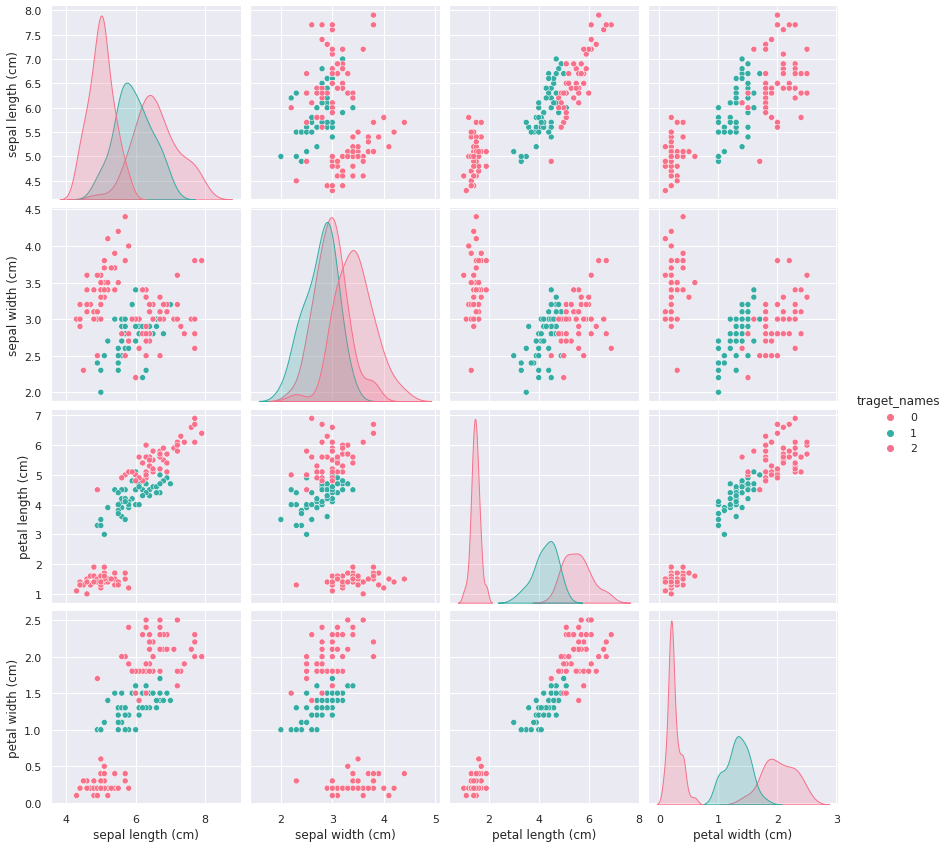

In [ ]:
import seaborn as sns # seaborn 資料視覺化，是以matplotlib為基礎建構的高階繪圖套件
sns.set()
sns.pairplot(data, hue='traget_names', size=3, palette="husl"); # 0:setosa, 1:versicoior, 2:virginica

熟悉seaborn畫圖 [Seaborn documentation](https://seaborn.pydata.org/api.html) 

選擇一個圖表製作

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


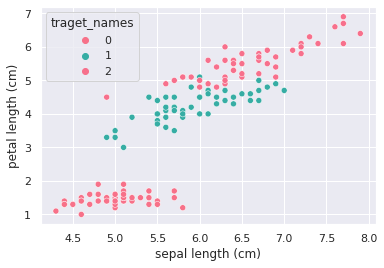

In [ ]:
sns.scatterplot(data["sepal length (cm)"],
                data["petal length (cm)"],
                hue = data["traget_names"],
                palette="husl")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(data.drop(["traget_names"], axis=1)), np.array(data["traget_names"])

# [題目90, 題目10, 答案90, 答案10]
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


將 X 改換成data #熟悉pandas & numpy
```
#  train, test = train_test_split(data, test_size=0.1)
```

In [ ]:
train, test = train_test_split(data, test_size=0.1)

print(np.array(train[train.columns[0:4]]))

In [52]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(312.48, 634.1999999999999, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [46, 44, 45]\nclass = t'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = t'),
 Text(468.72, 380.52, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 89\nvalue = [0, 44, 45]\nclass = a'),
 Text(312.48, 126.84000000000003, 'gini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = r'),
 Text(624.96, 126.84000000000003, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = a')]

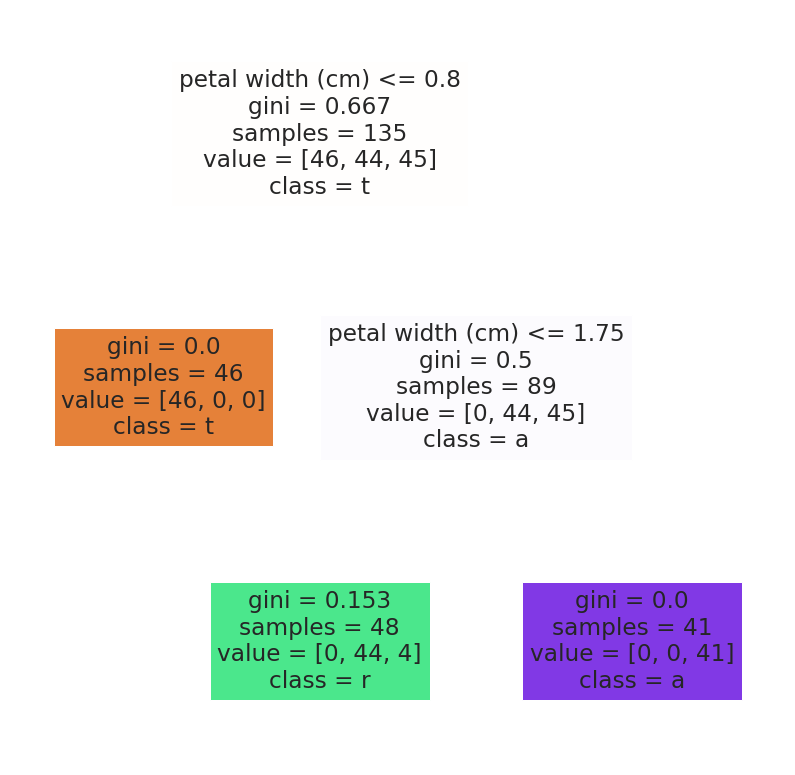

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (14, 14))
plot_tree(model,
          feature_names = data.columns[0:4],
          class_names = data.columns[4],
          filled = True)

Accuracy: 0.8666666666666667


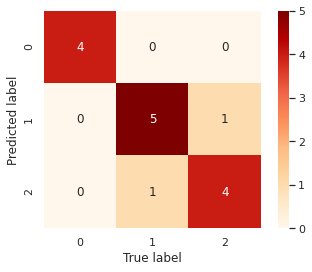

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pre_result = model.predict(x_test)
print("Accuracy:", accuracy_score(pre_result, y_test))

matrix = confusion_matrix(y_test, pre_result)
sns.heatmap(matrix.T, square = True, annot = True, fmt = 'd', cbar = True, cmap = 'OrRd')
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(np.array(data[data.columns[0:4]]))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
data["label"] = cluster.labels_
data

sepal length (cm)  sepal width (cm)  ...  traget_names  label
0                  5.1               3.5  ...             0      0
1                  4.9               3.0  ...             0      0
2                  4.7               3.2  ...             0      0
3                  4.6               3.1  ...             0      0
4                  5.0               3.6  ...             0      0
..                 ...               ...  ...           ...    ...
145                6.7               3.0  ...             2      2
146                6.3               2.5  ...             2      1
147                6.5               3.0  ...             2      2
148                6.2               3.4  ...             2      2
149                5.9               3.0  ...             2      1

[150 rows x 6 columns]

In [ ]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2, 10):
    test = KMeans(n_clusters=k)
    test.fit(np.array(data[data.columns[0:4]]))
    print("k:", k)
    score = silhouette_score(np.array(data[data.columns[0:4]]), test.labels_)
    print("score:", score)

k: 2
score: 0.6810461692117465
k: 3
score: 0.5528190123564102
k: 4
score: 0.49805050499728815
k: 5
score: 0.48874888709310654
k: 6
score: 0.36483400396700366
k: 7
score: 0.3475042328046173
k: 8
score: 0.3505070356057708
k: 9
score: 0.3282507928415111
